In [1]:
# Load libraries

import pandas as pd
import numpy as np 
import string
import random

import nltk
from nltk.corpus import brown
from nltk.corpus import reuters

from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer

In [2]:
#view text from one document 
reuters.raw(fileids=['test/14826'])[0:201]

"ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT\n  Mounting trade friction between the\n  U.S. And Japan has raised fears among many of Asia's exporting\n  nations that the row could inflict far-reaching"

In [3]:
import os
from os import listdir,path
from os.path import join,isfile
# remove punctuation from all DOCs 
#exclude = set(string.punctuation)
#mypath='C:\Users\USER\Desktop'
#alldocslist = []
#file_names = [f for f in listdir(mypath)if isfile(join(mypath, f))]

#for index, i in  enumerate(file_names):
#    text = open(os.path.join(mypath, i),'r')
#    text = ''.join(ch for ch in text if ch not in exclude)
#    alldocslist.append(text)
    
#print(alldocslist[1])

In [65]:
# remove punctuation from all DOCs 


exclude = set(string.punctuation)
mypath='./text'
alldocslist = list()
file_names = [f for f in listdir(mypath)if isfile(join(mypath, f))]
cntr=0
temp=list()
for i in range(len(file_names)):
    temp=[file_names[i]]
    alldocslist.append(temp)
cntr=0
for index, i in  enumerate(file_names):
    text = open(os.path.join(mypath, i),'r',encoding="Latin-1")
    text = ''.join(ch for ch in text if ch not in exclude)
    alldocslist[cntr].append(text)
    cntr=cntr+1

['25EASMarch-3369.txt', 'bitc.txt', 'bitcoin.txt', 'bitc_founder.txt', 'blockchain.txt', 'blockchain1 - Copy.txt', 'blockchain1.txt', 'blockchain2.txt', 'blockchain3.txt', 'cnn.txt', 'cnn1.txt', 'Comparison Between an Artificial Neural Network and Logistic Regression in Predicting Long Term Kidney Transplantation Outcome.txt', 'crypto-wiki.txt', 'cryptocurrency.txt', 'Elsevier Enhanced Reader.txt', 'internet2009.txt', 'internetmemes.txt', 'iot2009.txt', 'kunihiko.txt', 'Natural Language Processing with Python.txt', 'Natural_Language_Processing_and_Machine.txt', 'necognitrion1.txt', 'necognitron.txt', 'nlp.txt', 'peer2peerECS.txt', 'pooling (2).txt', 'pooling.txt', 'pwc.txt', 'satoshi_nakamoto_investopedia.txt', 'self_organising_nn.txt', 'stoshi_nakamoto.txt']


In [5]:
#tokenize words in all DOCS 
plot_data = [[]] * len(alldocslist)

for doc in alldocslist:
    text = doc
    tokentext = word_tokenize(text)
    plot_data[index].append(tokentext)
    
print(plot_data[0][1])

['What', 'is', 'Bitcoin', '?', 'Bitcoin', 'is', 'a', 'digital', 'currency', 'created', 'in', 'January', '2009', 'following', 'the', 'housing', 'market', 'crash', '.', 'It', 'follows', 'the', 'ideas', 'set', 'out', 'in', 'a', 'whitepaper', 'by', 'the', 'mysterious', 'and', 'pseudonymous', 'Satoshi', 'Nakamoto', '.', 'The', 'identity', 'of', 'the', 'person', 'or', 'persons', 'who', 'created', 'the', 'technology', 'is', 'still', 'a', 'mystery', '.', 'Bitcoin', 'offers', 'the', 'promise', 'of', 'lower', 'transaction', 'fees', 'than', 'traditional', 'online', 'payment', 'mechanisms', 'and', 'is', 'operated', 'by', 'a', 'decentralized', 'authority', ',', 'unlike', 'government-issued', 'currencies', '.', 'There', 'are', 'no', 'physical', 'bitcoins', ',', 'only', 'balances', 'kept', 'on', 'a', 'public', 'ledger', 'that', 'everyone', 'has', 'transparent', 'access', 'to', ',', 'that', '\x96', 'along', 'with', 'all', 'Bitcoin', 'transactions', '\x96', 'is', 'verified', 'by', 'a', 'massive', 'amou

In [6]:
# Navigation: first index gives all documents, second index gives specific document, third index gives words of that doc
plot_data[0][1][0:10]

['What',
 'is',
 'Bitcoin',
 '?',
 'Bitcoin',
 'is',
 'a',
 'digital',
 'currency',
 'created']

In [7]:
#make all words lower case for all docs 
for x in range(len(file_names)):
    lowers = [word.lower() for word in plot_data[0][x]]
    plot_data[0][x] = lowers

plot_data[0][1][0:10]

['what',
 'is',
 'bitcoin',
 '?',
 'bitcoin',
 'is',
 'a',
 'digital',
 'currency',
 'created']

In [8]:
# remove stop words from all docs 
stop_words = set(stopwords.words('english'))

for x in range(len(file_names)):
    filtered_sentence = [w for w in plot_data[0][x] if not w in stop_words]
    plot_data[0][x] = filtered_sentence

plot_data[0][1][0:10]

['bitcoin',
 '?',
 'bitcoin',
 'digital',
 'currency',
 'created',
 'january',
 '2009',
 'following',
 'housing']

In [9]:
#stem words EXAMPLE (could try others/lemmers )

snowball_stemmer = SnowballStemmer("english")
stemmed_sentence = [snowball_stemmer.stem(w) for w in filtered_sentence]
stemmed_sentence[0:10]

porter_stemmer = PorterStemmer()
snowball_stemmer = SnowballStemmer("english")
stemmed_sentence = [ porter_stemmer.stem(w) for w in filtered_sentence]
stemmed_sentence[0:10]

['satoshi',
 'nakamoto',
 'wikipedia',
 ',',
 'free',
 'encyclopedia',
 'jump',
 'navigationjump',
 'search',
 'satoshi']

In [10]:
# Create inverse index which gives document number for each document and where word appears

#first we need to create a list of all words 
l = plot_data[0]
flatten = [item for sublist in l for item in sublist]
words = flatten
wordsunique = set(words)
wordsunique = list(wordsunique)

In [11]:
# create functions for TD-IDF / BM25
import math
from textblob import TextBlob as tb

def tf(word, doc):
    return doc.count(word) / len(doc)

def n_containing(word, doclist):
    return sum(1 for doc in doclist if word in doc)

def idf(word, doclist):
    return math.log(len(doclist) / (0.01 + n_containing(word, doclist)))

def tfidf(word, doc, doclist):
    return (tf(word, doc) * idf(word, doclist))

In [12]:
# Create dictonary of words
# THIS ONE-TIME INDEXING IS THE MOST PROCESSOR-INTENSIVE STEP AND WILL TAKE TIME TO RUN (BUT ONLY NEEDS TO BE RUN ONCE)
import re
import numpy as np

plottest = plot_data[0][0:1000]

worddic = {}

for doc in plottest:
    for word in wordsunique:
        if word in doc:
            word = str(word)
            index = plottest.index(doc)
            positions = list(np.where(np.array(plottest[index]) == word)[0])
            idfs = tfidf(word,doc,plottest)
            try:
                worddic[word].append([index,positions,idfs])
            except:
                worddic[word] = []
                worddic[word].append([index,positions,idfs])


In [13]:
# the index creates a dic with each word as a KEY and a list of doc indexs, word positions, and td-idf score as VALUES
worddic['networks']

[[0, [890, 924, 3358], 0.0004611121266409789],
 [5, [881, 2885, 2916, 3133, 3486], 0.0009084048356839742],
 [7, [994], 0.00036246499038756054],
 [9,
  [14,
   33,
   95,
   109,
   158,
   255,
   258,
   493,
   605,
   616,
   741,
   1287,
   1344,
   1469,
   1601,
   1701,
   1778,
   1841,
   1850,
   1877,
   2061],
  0.006318873964939426],
 [10,
  [2,
   10,
   14,
   70,
   115,
   274,
   523,
   696,
   2770,
   4180,
   4252,
   4825,
   5102,
   5336,
   5883,
   5894,
   5920,
   6220,
   6261,
   6806],
  0.001873472292249852],
 [11,
  [92, 195, 274, 831, 1683, 2042, 2291, 2367, 2413, 2798],
  0.0021743128577707232],
 [12, [1163, 2809], 0.00032972738397032074],
 [13, [29], 0.000812759750893632],
 [14,
  [1,
   12,
   22,
   270,
   374,
   516,
   600,
   1503,
   1525,
   1989,
   2506,
   2817,
   3592,
   4420,
   4594,
   4610,
   5289,
   5455,
   6304,
   6364,
   6535,
   7104,
   7108,
   7369,
   7398,
   8360,
   8763,
   9362,
   10062,
   10078,
   10496,
   

In [14]:
# pickel (save) the dictonary to avoid re-calculating
np.save('worddic_1000.npy', worddic)

In [15]:
# create word search which takes multiple words and finds documents that contain both along with metrics for ranking:

    ## (1) Number of occruances of search words 
    ## (2) TD-IDF score for search words 
    ## (3) Percentage of search terms
    ## (4) Word ordering score 
    ## (5) Exact match bonus 


from collections import Counter

def search(searchsentence):
    try:
        # split sentence into individual words 
        searchsentence = searchsentence.lower()
        try:
            words = searchsentence.split(' ')
        except:
            words = list(words)
        enddic = {}
        idfdic = {}
        closedic = {}
        
        # remove words if not in worddic 
        realwords = []
        for word in words:
            if word in list(worddic.keys()):
                realwords.append(word)  
        words = realwords
        numwords = len(words)
        
        # make metric of number of occurances of all words in each doc & largest total IDF 
        for word in words:
            for indpos in worddic[word]:
                index = indpos[0]
                amount = len(indpos[1])
                idfscore = indpos[2]
                enddic[index] = amount
                idfdic[index] = idfscore
                fullcount_order = sorted(enddic.items(), key=lambda x:x[1], reverse=True)
                fullidf_order = sorted(idfdic.items(), key=lambda x:x[1], reverse=True)

                
        # make metric of what percentage of words appear in each doc
        combo = []
        alloptions = {k: worddic.get(k, None) for k in (words)}
        for worddex in list(alloptions.values()):
            for indexpos in worddex:
                for indexz in indexpos:
                    combo.append(indexz)
        comboindex = combo[::3]
        combocount = Counter(comboindex)
        for key in combocount:
            combocount[key] = combocount[key] / numwords
        combocount_order = sorted(combocount.items(), key=lambda x:x[1], reverse=True)
        
        # make metric for if words appear in same order as in search
        if len(words) > 1:
            x = []
            y = []
            for record in [worddic[z] for z in words]:
                for index in record:
                     x.append(index[0])
            for i in x:
                if x.count(i) > 1:
                    y.append(i)
            y = list(set(y))

            closedic = {}
            for wordbig in [worddic[x] for x in words]:
                for record in wordbig:
                    if record[0] in y:
                        index = record[0]
                        positions = record[1]
                        try:
                            closedic[index].append(positions)
                        except:
                            closedic[index] = []
                            closedic[index].append(positions)

            x = 0
            fdic = {}
            for index in y:
                csum = []
                for seqlist in closedic[index]:
                    while x > 0:
                        secondlist = seqlist
                        x = 0
                        sol = [1 for i in firstlist if i + 1 in secondlist]
                        csum.append(sol)
                        fsum = [item for sublist in csum for item in sublist]
                        fsum = sum(fsum)
                        fdic[index] = fsum
                        fdic_order = sorted(fdic.items(), key=lambda x:x[1], reverse=True)
                    while x == 0:
                        firstlist = seqlist
                        x = x + 1
        else:
            fdic_order = 0
                    
        # also the one above should be given a big boost if ALL found together 
           
        
        #could make another metric for if they are not next to each other but still close 
        
        
        return(searchsentence,words,fullcount_order,combocount_order,fullidf_order,fdic_order)
    
    except:
        return("")


search('the internet in 2009')[1]

['internet', '2009']

In [16]:
# 0 return will give back the search term, the rest will give back metrics (see above)

search('the internet in 2009')[1][1:10]

['2009']

In [17]:
# save metrics to dataframe for use in ranking and machine learning 
result1 = search('the internet in 2009')
result2 = search('Bitcoin is a digital currency technology')
result3 = search('anonymous person or group known as Satoshi Nakamoto')
result4 = search('The "neocognitron"[7] was introduced by Kunihiko Fukushima in 1980')
result5 = search('Neocognitron, origin of the CNN architecture')
result6 = search('pooling')
result7 = search('blockchain')
result8 = search('Convolutional Layer')
df = pd.DataFrame([result1,result2,result3,result4,result5,result6,result7,result8])
df.columns = ['search term', 'actual_words_searched','num_occur','percentage_of_terms','td-idf','word_order']
df

,search term,actual_words_searched,num_occur,percentage_of_terms,td-idf,word_order
0,the internet in 2009,"[internet, 2009]","[(15, 20), (14, 15), (1, 10), (2, 9), (16, 8),...","[(1, 1.0), (2, 1.0), (4, 1.0), (5, 1.0), (7, 1...","[(15, 0.02120674148654315), (16, 0.00775690437...","[(4, 2), (15, 2), (16, 1), (1, 0), (2, 0), (5,..."
1,bitcoin is a digital currency technology,"[bitcoin, digital, currency, technology]","[(7, 21), (5, 18), (27, 13), (0, 13), (6, 10),...","[(1, 1.0), (2, 1.0), (4, 1.0), (5, 1.0), (7, 1...","[(6, 0.02270699922599735), (27, 0.021054063252...","[(1, 6), (2, 6), (28, 5), (4, 3), (12, 3), (30..."
2,anonymous person or group known as satoshi nak...,"[anonymous, person, group, known, satoshi, nak...","[(30, 62), (28, 28), (3, 19), (2, 17), (1, 5),...","[(1, 1.0), (2, 1.0), (4, 1.0), (5, 1.0), (12, ...","[(30, 0.036163551027759054), (28, 0.0334226748...","[(28, 19), (2, 12), (30, 12), (3, 8), (1, 7), ..."
3,"the ""neocognitron""[7] was introduced by kunihi...","[introduced, kunihiko, fukushima, 1980]","[(22, 6), (2, 3), (7, 2), (14, 2), (21, 2), (2...","[(9, 1.0), (21, 1.0), (18, 0.75), (29, 0.75), ...","[(22, 0.024983184608193352), (18, 0.0050170105...","[(9, 3), (18, 3), (21, 2), (29, 2), (22, 1), (..."
4,"neocognitron, origin of the cnn architecture","[origin, cnn, architecture]","[(10, 28), (19, 11), (9, 9), (14, 9), (18, 3),...","[(9, 1.0), (12, 0.6666666666666666), (10, 0.66...","[(18, 0.0086995189760849), (29, 0.004087274001...","[(9, 3), (10, 1), (18, 1), (12, 0), (14, 0), (..."
5,pooling,[pooling],"[(26, 92), (10, 35), (25, 26), (9, 14)]","[(9, 1.0), (10, 1.0), (25, 1.0), (26, 1.0)]","[(25, 0.07080571909764763), (26, 0.02871326546...",0
6,blockchain,[blockchain],"[(5, 154), (7, 78), (2, 38), (27, 22), (12, 17...","[(1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 1...","[(27, 0.046818421723372826), (6, 0.04177238751...",0
7,convolutional layer,"[convolutional, layer]","[(10, 124), (21, 50), (26, 36), (9, 33), (25, ...","[(9, 1.0), (10, 1.0), (14, 1.0), (19, 1.0), (2...","[(10, 0.019870984375332308), (9, 0.01698692448...","[(26, 10), (9, 8), (10, 8), (14, 0), (19, 0)]"


In [18]:
# look to see if the top documents seem to make sense

alldocslist[1]

'What is Bitcoin?\nBitcoin is a digital currency created in January 2009 following the housing market crash. It follows the ideas set out in a whitepaper by the mysterious and pseudonymous Satoshi Nakamoto. The identity of the person or persons who created the technology is still a mystery. Bitcoin offers the promise of lower transaction fees than traditional online payment mechanisms and is operated by a decentralized authority, unlike government-issued currencies.\n\n\nThere are no physical bitcoins, only balances kept on a public ledger that everyone has transparent access to, that \x96 along with all Bitcoin transactions \x96 is verified by a massive amount of computing power. Bitcoins are not issued or backed by any banks or governments, nor are individual bitcoins valuable as a commodity. Despite it not being legal tender, Bitcoin charts high on popularity, and has triggered the launch of hundreds of other virtual currencies collectively referred to as Altcoins.\n\n\n1:57\nWhat I

In [63]:
# create a simple (non-machine learning) rank and return function

def rank(term):
    results = search(term)

    # get metrics 
    num_score = results[2]
    per_score = results[3]
    tfscore = results[4]
    order_score = results[5]
    final_candidates = []

    # rule1: if high word order score & 100% percentage terms then put at top position
    try:
        first_candidates = []

        for candidates in order_score:
            if candidates[1] > 1:
                first_candidates.append(candidates[0])

        second_candidates = []

        for match_candidates in per_score:
            if match_candidates[1] == 1:
                second_candidates.append(match_candidates[0])
            if match_candidates[1] == 1 and match_candidates[0] in first_candidates:
                final_candidates.append(match_candidates[0])

    # rule2: next add other word order score which are greater than 1 

        t3_order = first_candidates[0:3]
        for each in t3_order:
            if each not in final_candidates:
                final_candidates.insert(len(final_candidates),each)

    # rule3: next add top td-idf results
        final_candidates.insert(len(final_candidates),tfscore[0][0])
        final_candidates.insert(len(final_candidates),tfscore[1][0])

    # rule4: next add other high percentage score 
        t3_per = second_candidates[0:3]
        for each in t3_per:
            if each not in final_candidates:
                final_candidates.insert(len(final_candidates),each)

    #rule5: next add any other top results for metrics
        othertops = [num_score[0][0],per_score[0][0],tfscore[0][0],order_score[0][0]]
        for top in othertops:
            if top not in final_candidates:
                final_candidates.insert(len(final_candidates),top)
                
    # unless single term searched, in which case just return 
    except:
        othertops = [num_score[0][0],num_score[1][0],num_score[2][0],per_score[0][0],tfscore[0][0]]
        for top in othertops:
            if top not in final_candidates:
                final_candidates.insert(len(final_candidates),top)

    for index, results in enumerate(final_candidates):
        if index < 5:
            print("RESULT", index + 1, ": File Name : ",alldocslist[results][0].upper(),'\n\n',alldocslist[results][1:100],"...\n\n")

In [20]:
# example of output 
rank('visual cell')

[(21, 26), (29, 8), (14, 5), (22, 2), (11, 2), (0, 1), (9, 1), (10, 1), (19, 1)]
[(0, 1.0), (9, 1.0), (10, 1.0), (14, 1.0), (21, 1.0), (22, 1.0), (19, 0.5), (29, 0.5), (11, 0.5)]
[(29, 0.015555131533389407), (21, 0.0075700914785360035), (22, 0.007546444179891611), (11, 0.0009783807196042432), (9, 0.0006769806481961054), (14, 0.0003815835481105358), (0, 0.0003458128642564893), (10, 0.00021075269399470478), (19, 0.00013961585096511695)]
[(9, 1), (0, 0), (10, 0), (14, 0), (21, 0), (22, 0)]
RESULT 1 : Neocognitron: A self-organizing neural network model for a mechanism of pattern recognition unaffect ...
RESULT 2 : Biol. Cybernetics 36, 193 202 (1980) Biological
Cybernetics
9 by Springer-Verlag 1980
Neocognitron: ...
RESULT 3 : UREAS VOLUME 6, ISSUE 3 (March, 2016) (ISSN 2249-3905)
International Journal of Research in Engineer ...
RESULT 4 : In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural network ...
RESULT 5 : Convolutional Neural Networks (CN

In [21]:
# example of output 
rank('Kunihiko')

[(18, 3), (21, 2), (22, 2), (29, 2), (9, 1)]
[(9, 1.0), (18, 1.0), (21, 1.0), (22, 1.0), (29, 1.0)]
[(18, 0.01672065403108599), (22, 0.009251529387758237), (29, 0.005237216348817163), (9, 0.0008299413886103702), (21, 0.0007138861298035146)]
0
RESULT 1 : Kunihiko Fukushima
From Wikipedia, the free encyclopedia
Jump to navigationJump to search
Kunihiko F ...
RESULT 2 : Biol. Cybernetics 36, 193 202 (1980) Biological
Cybernetics
9 by Springer-Verlag 1980
Neocognitron: ...
RESULT 3 : Neocognitron
From Wikipedia, the free encyclopedia
Jump to navigationJump to search
The neocognitron ...
RESULT 4 : In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural network ...


In [22]:
# Create pseudo-truth set using first 5 words 
# Because I don't have a turth set I will generate a pseudo one by pulling terms from the documents - this is far from perfect
     # as it may not approximate well peoples actual queries but it will serve well to build the ML architecture 

df_truth = pd.DataFrame()

for doc in plottest:
    first_five = doc[0:5]
    test_sentence = ' '.join(first_five)
    result = search(test_sentence)
    df_temp = pd.DataFrame([result])
    df_truth= pd.concat([df_truth, df_temp])

df_truth['truth'] = range(0,len(plottest))

In [23]:
# create another psuedo-truth set using random 3 word sequence from docs

df_truth1 = pd.DataFrame()
seqlen = 3

for doc in plottest:
    try:
        start = random.randint(0,(len(doc)-seqlen))
        random_seq = doc[start:start+seqlen]
        test_sentence = ' '.join(random_seq)
    except:
        test_sentence = doc[0]
    result = search(test_sentence)
    df_temp = pd.DataFrame([result])
    df_truth1= pd.concat([df_truth1, df_temp])

df_truth1['truth'] = range(0,len(plottest))

In [24]:
# create another psuedo-truth set using different random 4 word sequence from docs

df_truth2 = pd.DataFrame()
seqlen = 4

for doc in plottest:
    try:
        start = random.randint(0,(len(doc)-seqlen))
        random_seq = doc[start:start+seqlen]
        test_sentence = ' '.join(random_seq)
    except:
        test_sentence = doc[0]
    result = search(test_sentence)
    df_temp = pd.DataFrame([result])
    df_truth2= pd.concat([df_truth2, df_temp])

df_truth2['truth'] = range(0,len(plottest))

In [25]:
# create another psuedo-truth set using different random 2 word sequence from docs

df_truth3 = pd.DataFrame()
seqlen = 2

for doc in plottest:
    try:
        start = random.randint(0,(len(doc)-seqlen))
        random_seq = doc[start:start+seqlen]
        test_sentence = ' '.join(random_seq)
    except:
        test_sentence = doc[0]
    result = search(test_sentence)
    df_temp = pd.DataFrame([result])
    df_truth3= pd.concat([df_truth3, df_temp])

df_truth3['truth'] = range(0,len(plottest))

In [26]:
# combine the truth sets and save to disk 
truth_set = pd.concat([df_truth,df_truth1,df_truth2,df_truth3])
truth_set.columns = ['search term', 'actual_words_searched','num_occur','percentage_of_terms','td-idf','word_order','truth']
truth_set.to_csv("truth_set_final.csv")

In [27]:
truth_set[0:10]

,search term,actual_words_searched,num_occur,percentage_of_terms,td-idf,word_order,truth
0,"ureas volume 6 , issue","[ureas, volume, 6, ,, issue]","[(26, 1142), (21, 458), (10, 436), (20, 284), ...","[(0, 1.0), (5, 0.8), (9, 0.6), (10, 0.6), (20,...","[(0, 0.003803941506821382), (24, 0.00115154880...","[(0, 41), (26, 12), (14, 6), (19, 4), (10, 3),...",0
0,bitcoin ? bitcoin digital currency,"[bitcoin, ?, bitcoin, digital, currency]","[(22, 36), (12, 20), (1, 18), (2, 14), (14, 10...","[(1, 0.8), (2, 0.8), (3, 0.8), (5, 0.8), (7, 0...","[(22, 0.03129353076671049), (1, 0.008066363016...","[(1, 9), (2, 9), (28, 4), (12, 3), (4, 2), (30...",1
0,"bitcoin wikipedia , free encyclopedia","[bitcoin, wikipedia, ,, free, encyclopedia]","[(19, 1029), (21, 458), (10, 436), (11, 204), ...","[(2, 1.0), (12, 1.0), (30, 1.0), (5, 0.8), (18...","[(18, 0.005017010568617829), (22, 0.0041638641...","[(2, 4), (13, 4), (12, 3), (18, 3), (22, 3), (...",2
0,three people supposedly bitcoin founder,"[three, people, supposedly, bitcoin, founder]","[(2, 287), (1, 114), (5, 42), (28, 29), (13, 1...","[(3, 1.0), (30, 1.0), (2, 0.6), (5, 0.6), (16,...","[(1, 0.039195067632697096), (2, 0.026616061100...","[(3, 4), (7, 1), (30, 1), (1, 0), (2, 0), (5, ...",3
0,first sight its pretty clear,"[first, sight, its, pretty, clear]","[(2, 14), (12, 11), (21, 7), (17, 5), (24, 5),...","[(4, 1.0), (5, 0.6), (0, 0.4), (1, 0.4), (7, 0...","[(17, 0.009374642605360172), (4, 0.00528275736...","[(4, 4), (0, 0), (1, 0), (5, 0), (7, 0), (10, ...",4
0,"following banking , investing ,","[following, banking, ,, investing, ,]","[(14, 2418), (26, 1142), (19, 1029), (21, 458)...","[(1, 0.8), (5, 0.8), (2, 0.6), (12, 0.6), (0, ...","[(15, -6.601463130056997e-06), (6, -1.21918037...","[(14, 10), (29, 6), (5, 4), (21, 4), (25, 4), ...",5
0,blockchain technology ? blockchain technology,"[blockchain, technology, ?, blockchain, techno...","[(22, 36), (7, 21), (24, 21), (5, 18), (27, 13...","[(1, 0.6), (2, 0.6), (5, 0.6), (6, 0.6), (7, 0...","[(22, 0.03129353076671049), (6, 0.022706999225...","[(7, 25), (5, 19), (6, 19), (27, 18), (13, 4),...",6
0,21st century technology . increasing,"[21st, century, technology, ., increasing]","[(19, 814), (21, 351), (12, 214), (11, 165), (...","[(7, 1.0), (0, 0.6), (1, 0.6), (2, 0.6), (4, 0...","[(4, 0.003276529307704397), (24, 0.00087560233...","[(7, 7), (24, 3), (6, 2), (1, 1), (2, 1), (18,...",7
0,surely 's complicated ? yes,"[surely, 's, complicated, ?, yes]","[(22, 36), (30, 31), (3, 23), (24, 21), (2, 20...","[(8, 1.0), (10, 0.6), (5, 0.6), (1, 0.4), (2, ...","[(22, 0.03129353076671049), (3, 0.010630603381...","[(8, 4), (3, 1), (1, 0), (2, 0), (5, 0), (6, 0...",8
0,"deep learning , convolutional neural","[deep, learning, ,, convolutional, neural]","[(2, 446), (0, 385), (5, 304), (12, 270), (1, ...","[(9, 1.0), (10, 1.0), (14, 1.0), (18, 1.0), (2...","[(18, 0.028491282213318102), (9, 0.01319905788...","[(14, 28), (26, 14), (9, 9), (18, 6), (22, 6),...",9


In [28]:
truth_set
test_set = truth_set[0:3]
test_set

,search term,actual_words_searched,num_occur,percentage_of_terms,td-idf,word_order,truth
0,"ureas volume 6 , issue","[ureas, volume, 6, ,, issue]","[(26, 1142), (21, 458), (10, 436), (20, 284), ...","[(0, 1.0), (5, 0.8), (9, 0.6), (10, 0.6), (20,...","[(0, 0.003803941506821382), (24, 0.00115154880...","[(0, 41), (26, 12), (14, 6), (19, 4), (10, 3),...",0
0,bitcoin ? bitcoin digital currency,"[bitcoin, ?, bitcoin, digital, currency]","[(22, 36), (12, 20), (1, 18), (2, 14), (14, 10...","[(1, 0.8), (2, 0.8), (3, 0.8), (5, 0.8), (7, 0...","[(22, 0.03129353076671049), (1, 0.008066363016...","[(1, 9), (2, 9), (28, 4), (12, 3), (4, 2), (30...",1
0,"bitcoin wikipedia , free encyclopedia","[bitcoin, wikipedia, ,, free, encyclopedia]","[(19, 1029), (21, 458), (10, 436), (11, 204), ...","[(2, 1.0), (12, 1.0), (30, 1.0), (5, 0.8), (18...","[(18, 0.005017010568617829), (22, 0.0041638641...","[(2, 4), (13, 4), (12, 3), (18, 3), (22, 3), (...",2


In [29]:
# convert to long format for ML 
# WARNING AGAIN THIS IS A SLOW PROCESS DUE TO RAM ILOC - COULD BE OPTIMISED FOR FASTER PERFORMANCE 
# BUG When min(maxnum, len(truth_set) <- is a int not a list because of very short variable length)

# row is row
# column is variable
# i is the result 

final_set =  pd.DataFrame()
test_set = truth_set[1:100]
maxnum = 5

for row in range(0,len(test_set.index)):
    test_set = truth_set[1:100]
    for col in range(2,6):
        for i in range(0,min(maxnum,len(truth_set.iloc[row][col]))):
            x = pd.DataFrame([truth_set.iloc[row][col][i]])
            x['truth'] = truth_set.iloc[row]['truth']
            x.columns = [(str(truth_set.columns[col]),"index",i),(str(truth_set.columns[col]),"score",i),'truth']
            test_set = test_set.merge(x,on='truth')
    final_set = pd.concat([final_set,test_set])
        
final_set.head()

,search term,actual_words_searched,num_occur,percentage_of_terms,td-idf,word_order,truth,"(num_occur, index, 0)","(num_occur, score, 0)","(num_occur, index, 1)",...,"(word_order, index, 0)","(word_order, score, 0)","(word_order, index, 1)","(word_order, score, 1)","(word_order, index, 2)","(word_order, score, 2)","(word_order, index, 3)","(word_order, score, 3)","(word_order, index, 4)","(word_order, score, 4)"
0,ureas volume 6,"[ureas, volume, 6]","[(26, 21), (0, 15), (14, 12), (19, 8), (21, 8)...","[(0, 1.0), (5, 0.6666666666666666), (9, 0.6666...","[(25, 0.0045581282768224485), (29, 0.002135990...","[(0, 20), (5, 0), (9, 0), (10, 0), (20, 0)]",0,26,1142,21,...,0,41,26.0,12.0,14.0,6.0,19.0,4.0,10.0,3.0
1,axiomatizations critical facts must,"[axiomatizations, critical, facts, must]","[(5, 15), (14, 13), (2, 11), (10, 6), (24, 5),...","[(0, 1.0), (2, 0.5), (10, 0.5), (14, 0.5), (19...","[(5, 0.0035809825898847915), (23, 0.0019181198...","[(0, 3), (2, 0), (10, 0), (14, 0), (19, 0)]",0,26,1142,21,...,0,41,26.0,12.0,14.0,6.0,19.0,4.0,10.0,3.0
2,wiebe et,"[wiebe, et]","[(14, 129), (19, 12), (9, 9), (0, 8), (10, 5),...","[(0, 1.0), (9, 0.5), (10, 0.5), (11, 0.5), (14...","[(14, 0.009844855541251824), (9, 0.00609282583...","[(0, 1)]",0,26,1142,21,...,0,41,26.0,12.0,14.0,6.0,19.0,4.0,10.0,3.0
0,bitcoin ? bitcoin digital currency,"[bitcoin, ?, bitcoin, digital, currency]","[(22, 36), (12, 20), (1, 18), (2, 14), (14, 10...","[(1, 0.8), (2, 0.8), (3, 0.8), (5, 0.8), (7, 0...","[(22, 0.03129353076671049), (1, 0.008066363016...","[(1, 9), (2, 9), (28, 4), (12, 3), (4, 2), (30...",1,22,36,12,...,1,9,2.0,9.0,28.0,4.0,12.0,3.0,4.0,2.0
1,. also known,"[., also, known]","[(29, 61), (16, 46), (25, 20), (2, 10), (1, 5)...","[(0, 1.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 1...","[(6, 0.004010192676579764), (13, 0.00143538261...","[(20, 5), (21, 5), (1, 4), (10, 4), (2, 2), (5...",1,22,36,12,...,1,9,2.0,9.0,28.0,4.0,12.0,3.0,4.0,2.0


In [30]:
final_set.to_csv("ML_set_100.csv")

In [31]:
final_set2 = final_set.drop(['actual_words_searched','num_occur','percentage_of_terms','search term','td-idf','word_order'], 1)
final_set2.to_csv("ML_set_100_3.csv")
final_set2.head()

,truth,"(num_occur, index, 0)","(num_occur, score, 0)","(num_occur, index, 1)","(num_occur, score, 1)","(num_occur, index, 2)","(num_occur, score, 2)","(num_occur, index, 3)","(num_occur, score, 3)","(num_occur, index, 4)",...,"(word_order, index, 0)","(word_order, score, 0)","(word_order, index, 1)","(word_order, score, 1)","(word_order, index, 2)","(word_order, score, 2)","(word_order, index, 3)","(word_order, score, 3)","(word_order, index, 4)","(word_order, score, 4)"
0,0,26,1142,21,458,10,436,20.0,284.0,11.0,...,0,41,26.0,12.0,14.0,6.0,19.0,4.0,10.0,3.0
1,0,26,1142,21,458,10,436,20.0,284.0,11.0,...,0,41,26.0,12.0,14.0,6.0,19.0,4.0,10.0,3.0
2,0,26,1142,21,458,10,436,20.0,284.0,11.0,...,0,41,26.0,12.0,14.0,6.0,19.0,4.0,10.0,3.0
0,1,22,36,12,20,1,18,2.0,14.0,14.0,...,1,9,2.0,9.0,28.0,4.0,12.0,3.0,4.0,2.0
1,1,22,36,12,20,1,18,2.0,14.0,14.0,...,1,9,2.0,9.0,28.0,4.0,12.0,3.0,4.0,2.0


In [32]:
final_set3 = final_set2
final_set3[0:10]

,truth,"(num_occur, index, 0)","(num_occur, score, 0)","(num_occur, index, 1)","(num_occur, score, 1)","(num_occur, index, 2)","(num_occur, score, 2)","(num_occur, index, 3)","(num_occur, score, 3)","(num_occur, index, 4)",...,"(word_order, index, 0)","(word_order, score, 0)","(word_order, index, 1)","(word_order, score, 1)","(word_order, index, 2)","(word_order, score, 2)","(word_order, index, 3)","(word_order, score, 3)","(word_order, index, 4)","(word_order, score, 4)"
0,0,26,1142,21,458,10,436,20.0,284.0,11.0,...,0,41,26.0,12.0,14.0,6.0,19.0,4.0,10.0,3.0
1,0,26,1142,21,458,10,436,20.0,284.0,11.0,...,0,41,26.0,12.0,14.0,6.0,19.0,4.0,10.0,3.0
2,0,26,1142,21,458,10,436,20.0,284.0,11.0,...,0,41,26.0,12.0,14.0,6.0,19.0,4.0,10.0,3.0
0,1,22,36,12,20,1,18,2.0,14.0,14.0,...,1,9,2.0,9.0,28.0,4.0,12.0,3.0,4.0,2.0
1,1,22,36,12,20,1,18,2.0,14.0,14.0,...,1,9,2.0,9.0,28.0,4.0,12.0,3.0,4.0,2.0
2,1,22,36,12,20,1,18,2.0,14.0,14.0,...,1,9,2.0,9.0,28.0,4.0,12.0,3.0,4.0,2.0
3,1,22,36,12,20,1,18,2.0,14.0,14.0,...,1,9,2.0,9.0,28.0,4.0,12.0,3.0,4.0,2.0
0,2,19,1029,21,458,10,436,11.0,204.0,7.0,...,2,4,13.0,4.0,12.0,3.0,18.0,3.0,22.0,3.0
1,2,19,1029,21,458,10,436,11.0,204.0,7.0,...,2,4,13.0,4.0,12.0,3.0,18.0,3.0,22.0,3.0
2,2,19,1029,21,458,10,436,11.0,204.0,7.0,...,2,4,13.0,4.0,12.0,3.0,18.0,3.0,22.0,3.0


In [33]:
# Load libraries 
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as sm
import statsmodels.api as sma
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import cross_validate,KFold,train_test_split
from sklearn import linear_model, feature_selection,preprocessing
from sklearn.metrics import mean_squared_error

In [34]:
final_set3['y'] = final_set3['truth']
final_set3 = final_set3.drop(['truth'], 1)
final_set3

,"(num_occur, index, 0)","(num_occur, score, 0)","(num_occur, index, 1)","(num_occur, score, 1)","(num_occur, index, 2)","(num_occur, score, 2)","(num_occur, index, 3)","(num_occur, score, 3)","(num_occur, index, 4)","(num_occur, score, 4)",...,"(word_order, score, 0)","(word_order, index, 1)","(word_order, score, 1)","(word_order, index, 2)","(word_order, score, 2)","(word_order, index, 3)","(word_order, score, 3)","(word_order, index, 4)","(word_order, score, 4)",y
0,26,1142,21,458,10,436,20.0,284.0,11.0,204.0,...,41,26.0,12.0,14.0,6.0,19.0,4.0,10.0,3.0,0
1,26,1142,21,458,10,436,20.0,284.0,11.0,204.0,...,41,26.0,12.0,14.0,6.0,19.0,4.0,10.0,3.0,0
2,26,1142,21,458,10,436,20.0,284.0,11.0,204.0,...,41,26.0,12.0,14.0,6.0,19.0,4.0,10.0,3.0,0
0,22,36,12,20,1,18,2.0,14.0,14.0,10.0,...,9,2.0,9.0,28.0,4.0,12.0,3.0,4.0,2.0,1
1,22,36,12,20,1,18,2.0,14.0,14.0,10.0,...,9,2.0,9.0,28.0,4.0,12.0,3.0,4.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,7,14,5,3,4,2,12.0,2.0,13.0,2.0,...,1,7.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4
0,14,2418,26,1142,19,1029,21.0,458.0,20.0,284.0,...,2,5.0,1.0,0.0,0.0,2.0,0.0,16.0,0.0,5
1,14,2418,26,1142,19,1029,21.0,458.0,20.0,284.0,...,2,5.0,1.0,0.0,0.0,2.0,0.0,16.0,0.0,5
2,14,2418,26,1142,19,1029,21.0,458.0,20.0,284.0,...,2,5.0,1.0,0.0,0.0,2.0,0.0,16.0,0.0,5


In [35]:
data = final_set3
data.corr()['y']

(num_occur, index, 0)             -0.029505
(num_occur, score, 0)              0.043943
(num_occur, index, 1)              0.041411
(num_occur, score, 1)              0.039071
(num_occur, index, 2)              0.251069
(num_occur, score, 2)              0.038315
(num_occur, index, 3)              0.028205
(num_occur, score, 3)              0.032323
(num_occur, index, 4)              0.037847
(num_occur, score, 4)              0.041958
(percentage_of_terms, index, 0)    0.523454
(percentage_of_terms, score, 0)    0.029703
(percentage_of_terms, index, 1)    0.298882
(percentage_of_terms, score, 1)    0.220459
(percentage_of_terms, index, 2)   -0.023530
(percentage_of_terms, score, 2)    0.123263
(percentage_of_terms, index, 3)    0.172155
(percentage_of_terms, score, 3)    0.180705
(percentage_of_terms, index, 4)    0.023379
(percentage_of_terms, score, 4)    0.097777
(td-idf, index, 0)                 0.254292
(td-idf, score, 0)                 0.047955
(td-idf, index, 1)              

In [36]:
data['a'] = data[data.columns[0]]
data['b'] = data[data.columns[10]]
data['c'] = data[data.columns[20]]
data['d'] = data[data.columns[30]]

In [37]:
X = data

train,test = train_test_split(X,train_size=0.80)

model = sm.ols(formula='y ~ 1 + a + b + c + d', 
               data=train).fit()

modelforout = model 

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     123.6
Date:                Tue, 21 Jul 2020   Prob (F-statistic):           3.95e-58
Time:                        18:51:10   Log-Likelihood:                -791.99
No. Observations:                 256   AIC:                             1594.
Df Residuals:                     251   BIC:                             1612.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8248      1.003      1.819      0.070      -0.151       3.800
a             -0.1055      0.047     -2.230      0.027      -0.199      -0.012
b              0.1936      0.053      3.664      0.000       0.090       0.298
c              0.1570      0.042      3.741      0.000       0.074       0.240
d              0.7032      0.049     14.480      0.000       0.608       0.799
==============================================================================
Omnibus:                      117.348   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              725.593
Skew:                           1.730   Prob(JB):                    2.75e-158
Kurtosis:                      10.487   Cond. No.                         85.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

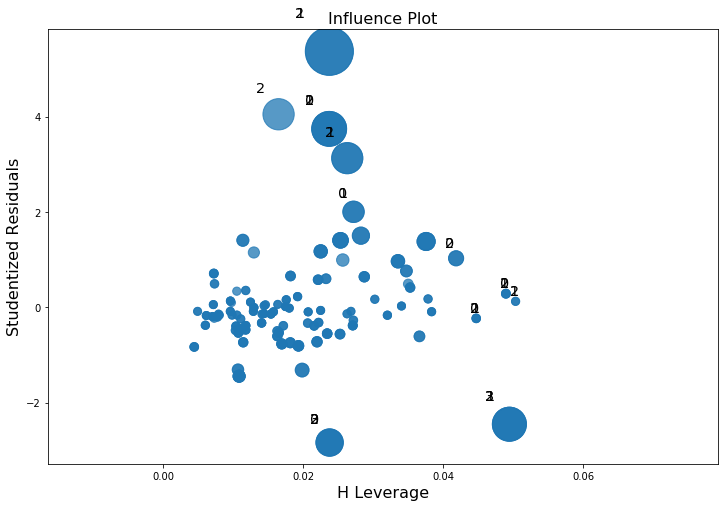

In [38]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sma.graphics.influence_plot(modelforout, ax=ax, criterion="cooks")

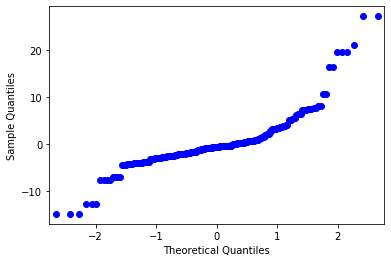

In [39]:
res = model.resid # residuals
fig = sma.qqplot(res)
plt.show()


In [61]:
term = input("search: ")
rank(term)

search: automatic
RESULT 1 : File Name :  CNN.TXT 
 ['In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery.[1] They are also known as shift invariant or space invariant artificial neural networks (SIANN), based on their shared-weights architecture and translation invariance characteristics.[2][3] They have applications in image and video recognition, recommender systems,[4] image classification, medical image analysis, natural language processing,[5] and financial time series.[6]\n\nCNNs are regularized versions of multilayer perceptrons. Multilayer perceptrons usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting data. Typical ways of regularization include adding some form of magnitude measurement of weights to the loss function. CNNs take a diff

In [62]:
term = input("search: ")
try:
    result = rank(term)
    result
    feedback = input("were these articles helpful?, (Y/N): ")
    if feedback == "Y":
        np.save('correct_search.npy', worddic) 
    elif feedback == "exit":
    else:
        print("sorry it was not helpful, try again")
except:
    print("no results found")

IndentationError: expected an indented block (<ipython-input-62-5829a3e76f29>, line 9)